# Comparaison between great output and gprofiler output

This notebook is intended to compare the results obtained with the enrichment function of greatpy with those obtained with the gprofiler package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import greatpy as great
from gprofiler import GProfiler
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt 

## Compute the resultats 

### with great

In [3]:
test = "../data/tests/test_data/input/03_srf_hg19.bed"
regdom = "../data/human/hg19/regulatory_domain.bed"
size = "../data/human/hg19/chr_size.bed"

In [4]:
enrichment = great.tl.GREAT.enrichment(
    test_file=test,
    regdom_file=regdom,
    chr_size_file=size,
    annotation_file="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    )
great.tl.GREAT.set_bonferroni(enrichment)
great.tl.GREAT.set_fdr(enrichment)

### With gprofile

#### Preprocessing

In [ ]:
L = []
f = open(test)
cdc = f.readline()
while cdc != "": 
    cdc = cdc.split("\t")
    cdc = ":".join(cdc)
    cdc = cdc.strip()
    L.append(cdc[3:])
    cdc = f.readline()

In [ ]:
back = pd.read_csv(regdom,sep="\t",comment="#",
                    names=["Chr", "Chr_Start", "Chr_End","Name","tss","Strand"],dtype={"Chr":"object", "Chr_Start":"int64", "Chr_End":"int64","Name":"object","tss":"int64","Strand":"object"})
back = list(back["Name"])

#### Computation

In [ ]:
gp_no_correct = GProfiler(return_dataframe=True)
gp_no_correct = gp_no_correct.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,user_threshold=0.005,
            )

gp_no_correct = gp_no_correct.loc[(gp_no_correct["source"] == "GO:MF")|(gp_no_correct["source"] == "GO:CC")|(gp_no_correct["source"] == "GO:BP")]

In [ ]:
gp_no_correct

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
75,GO:MF,GO:0000049,tRNA binding,1.00000e+00,False,"""Binding to a transfer RNA."" [GOC:ai]",63,122,1,18433,8.19672e-03,1.58730e-02,query_1,[GO:0003723]
7713,GO:BP,GO:0050678,regulation of epithelial cell proliferation,1.00000e+00,False,"""Any process that modulates the frequency, rat...",335,122,2,18433,1.63934e-02,5.97015e-03,query_1,"[GO:0042127, GO:0050673]"
7714,GO:BP,GO:0050679,positive regulation of epithelial cell prolife...,1.00000e+00,False,"""Any process that activates or increases the r...",193,122,1,18433,8.19672e-03,5.18135e-03,query_1,"[GO:0008284, GO:0050673, GO:0050678]"
7715,GO:BP,GO:0050708,regulation of protein secretion,1.00000e+00,False,"""Any process that modulates the frequency, rat...",242,122,1,18433,8.19672e-03,4.13223e-03,query_1,"[GO:0009306, GO:0051223, GO:1903530]"
7716,GO:BP,GO:0050727,regulation of inflammatory response,1.00000e+00,False,"""Any process that modulates the frequency, rat...",348,122,2,18433,1.63934e-02,5.74713e-03,query_1,"[GO:0006954, GO:0031347, GO:0032101]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11553,GO:BP,GO:0008154,actin polymerization or depolymerization,1.00000e+00,False,"""Assembly or disassembly of actin filaments by...",194,122,4,18433,3.27869e-02,2.06186e-02,query_1,[GO:0007015]
11554,GO:BP,GO:0008202,steroid metabolic process,1.00000e+00,False,"""The chemical reactions and pathways involving...",314,122,4,18433,3.27869e-02,1.27389e-02,query_1,"[GO:0006629, GO:1901360]"
11555,GO:BP,GO:0008203,cholesterol metabolic process,1.00000e+00,False,"""The chemical reactions and pathways involving...",135,122,1,18433,8.19672e-03,7.40741e-03,query_1,"[GO:0016125, GO:1902652]"
11556,GO:BP,GO:0008206,bile acid metabolic process,1.00000e+00,False,"""The chemical reactions and pathways involving...",49,122,2,18433,1.63934e-02,4.08163e-02,query_1,"[GO:0008202, GO:0032787, GO:1901615]"


#### Add the GProfiler pvalue on the BinomP_and_HypergeomP df

In [ ]:
val = []
for i in enrichment.index: 
    try : 
        val.append(float(gp_no_correct.loc[gp_no_correct["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment["gprofile_p_val"] = val


## Plot the p-value without correction

### great_hypergeom vs gprofiler_hypergeom

whithout log scale

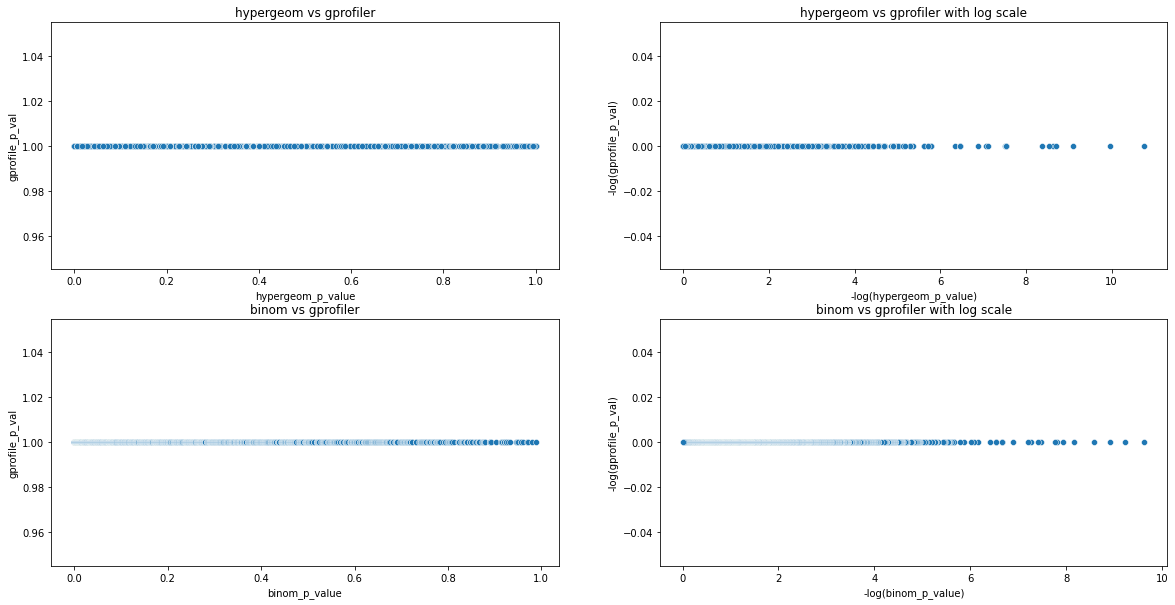

In [ ]:
fig,ax = plt.subplots(2,2,figsize = (20,10))
great.pl.scatterplot(enrichment,"hypergeom_p_value","gprofile_p_val",minus_log10=False,ax=ax[0,0],title="hypergeom vs gprofiler")
great.pl.scatterplot(enrichment,"hypergeom_p_value","gprofile_p_val",minus_log10=True,ax = ax[0,1],title="hypergeom vs gprofiler with log scale")
great.pl.scatterplot(enrichment,"binom_p_value","gprofile_p_val",minus_log10=False,ax = ax[1,0],title="binom vs gprofiler")
great.pl.scatterplot(enrichment,"binom_p_value","gprofile_p_val",minus_log10=True,ax=ax[1,1],title="binom vs gprofiler with log scale")
plt.show() 

We can see that the values are totally different between the one returned by greatpy and GProfile. I have not been able to check my results on the great webserver for the moment because it is no longer accessible. 

However, it seems very strange that gprofile_p_val only returns 1. Could be related to the selection of GO ID between enrichment and gp

# Comparison with a fdr correction

In [ ]:
gp_correct_fdr = GProfiler(return_dataframe=True)
gp_correct_fdr = gp_correct_fdr.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,
            user_threshold=0.005,
            significance_threshold_method="fdr")

gp_correct_fdr = gp_correct_fdr.loc[(gp_correct_fdr["source"] == "GO:MF")|(gp_correct_fdr["source"] == "GO:CC")|(gp_correct_fdr["source"] == "GO:BP")]

gp_correct_bonferroni = GProfiler(return_dataframe=True)
gp_correct_bonferroni = gp_correct_bonferroni.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,
            user_threshold=0.005,
            significance_threshold_method="fdr")

gp_correct_bonferroni = gp_correct_bonferroni.loc[(gp_correct_bonferroni["source"] == "GO:MF")|(gp_correct_bonferroni["source"] == "GO:CC")|(gp_correct_bonferroni["source"] == "GO:BP")]

In [ ]:
val=[]
for i in enrichment.index: 
    try : 
        val.append(float(gp_correct_fdr.loc[gp_correct_fdr["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment["gprofile_p_val_fdr"] = val

val=[]
for i in enrichment.index: 
    try : 
        val.append(float(gp_correct_bonferroni.loc[gp_correct_bonferroni["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment["gprofile_p_val_bonferroni"] = val

## Plot of the p-value with correction

### great_hypergeom_fdr vs gprofiler_hypergeom_fdr

In [ ]:
enrichment

,go_term,binom_p_value,binom_fold_enrichment,hypergeom_p_value,hypergeometric_fold_enrichment,binom_bonferroni,hypergeom_bonferroni,binom_fdr,hypergeom_fdr,gprofile_p_val,gprofile_p_val_fdr,gprofile_p_val_bonferroni
GO:0015727,lactate transport,7.60590e-06,1.24703e+05,2.30069e-02,4.34653e+01,2.27873e-02,1.00000e+00,2.27873e-02,2.55291e-01,NaN,NaN,NaN
GO:0030574,collagen catabolic process,6.55513e-05,2.19762e+03,4.78304e-03,4.52763e+00,1.96392e-01,1.00000e+00,9.70693e-02,2.55291e-01,1.00000e+00,3.21801e-01,3.21801e-01
GO:0009925,basal plasma membrane,9.71989e-05,2.04379e+03,1.11533e-04,7.67034e+00,2.91208e-01,3.34152e-01,9.70693e-02,9.80092e-02,1.00000e+00,4.63403e-01,4.63403e-01
GO:0001664,G protein-coupled receptor binding,1.34590e-04,1.56274e+03,1.02889e-02,3.25990e+00,4.03231e-01,1.00000e+00,1.00808e-01,2.55291e-01,1.00000e+00,6.54667e-01,6.54667e-01
GO:0051403,stress-activated MAPK cascade,1.88598e-04,2.37466e+03,2.34952e-02,4.82948e+00,5.65039e-01,1.00000e+00,1.13008e-01,2.56904e-01,1.00000e+00,3.41631e-01,3.41631e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0060271,cilium assembly,9.69389e-01,7.04877e+01,9.96710e-01,1.78136e-01,1.00000e+00,1.00000e+00,9.70685e-01,1.00000e+00,1.00000e+00,9.02857e-01,9.02857e-01
GO:0018105,peptidyl-serine phosphorylation,9.71387e-01,6.91582e+01,9.91356e-01,2.14115e-01,1.00000e+00,1.00000e+00,9.72361e-01,1.00000e+00,1.00000e+00,9.01690e-01,9.01690e-01
GO:0005768,endosome,9.79136e-01,8.51959e+01,9.94962e-01,2.74229e-01,1.00000e+00,1.00000e+00,9.79790e-01,1.00000e+00,1.00000e+00,1.72410e-01,1.72410e-01
GO:0007420,brain development,9.87730e-01,7.70685e+01,9.58504e-01,4.08125e-01,1.00000e+00,1.00000e+00,9.88060e-01,9.78092e-01,1.00000e+00,5.70402e-01,5.70402e-01


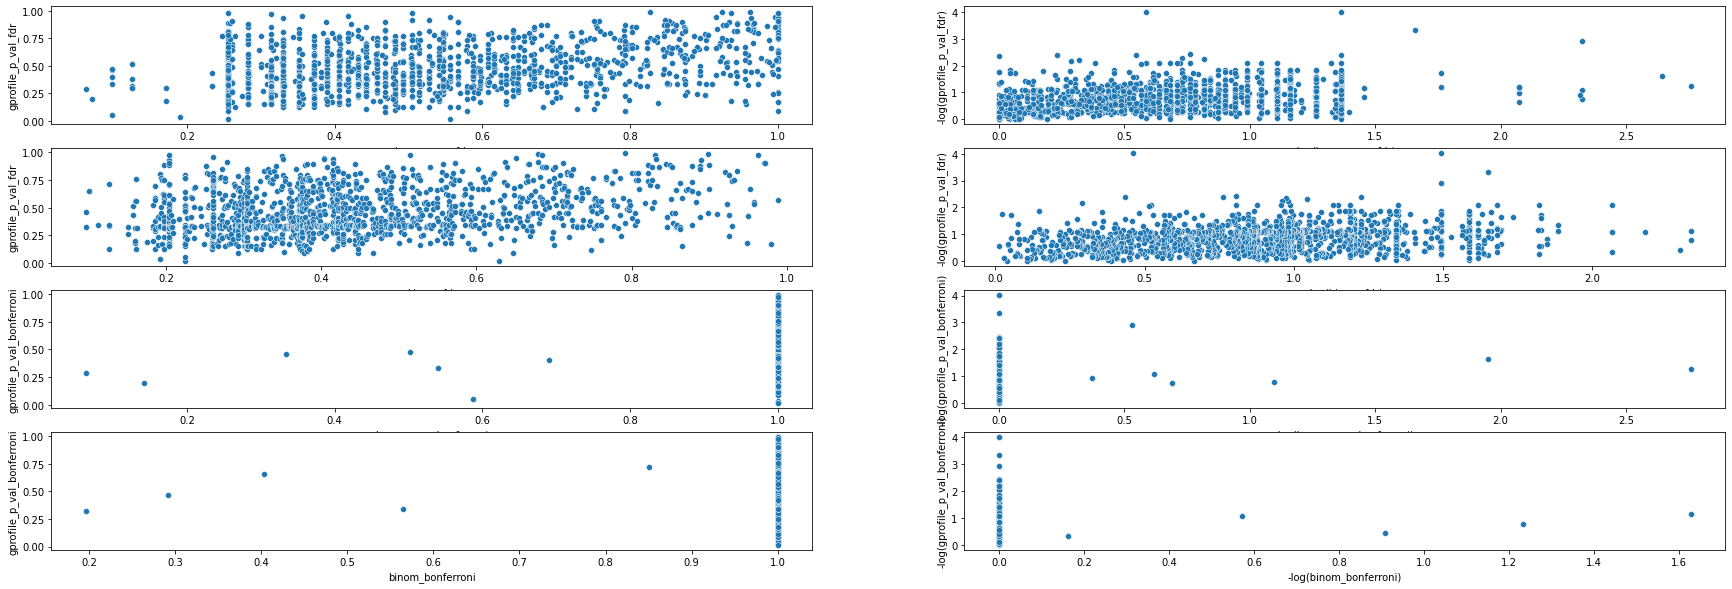

In [ ]:
fig,ax = plt.subplots(4,2,figsize = (30,10))
great.pl.scatterplot(enrichment,"hypergeom_fdr","gprofile_p_val_fdr",minus_log10=False,ax=ax[0,0])
great.pl.scatterplot(enrichment,"hypergeom_fdr","gprofile_p_val_fdr",minus_log10=True,ax=ax[0,1])
great.pl.scatterplot(enrichment,"binom_fdr","gprofile_p_val_fdr",minus_log10=False,ax=ax[1,0])
great.pl.scatterplot(enrichment,"binom_fdr","gprofile_p_val_fdr",minus_log10=True,ax=ax[1,1])

great.pl.scatterplot(enrichment,"hypergeom_bonferroni","gprofile_p_val_bonferroni",minus_log10=False,ax=ax[2,0])
great.pl.scatterplot(enrichment,"hypergeom_bonferroni","gprofile_p_val_bonferroni",minus_log10=True,ax=ax[2,1])
great.pl.scatterplot(enrichment,"binom_bonferroni","gprofile_p_val_bonferroni",minus_log10=False,ax=ax[3,0])
great.pl.scatterplot(enrichment,"binom_bonferroni","gprofile_p_val_bonferroni",minus_log10=True,ax=ax[3,1])
plt.show() 
